### 2021 Spring "EE479: Scientific Computing & Data"

#### Tae Hyung Kim (KAIST EE Yong-Hoon Kim Group) 
#### Kutz 7.4, 7.5, 7.7, & 7.8


#### 2021. 05. 06 Revised from matlab version 

### Kutz 7.4 Boundary Value Problems: The Shooting Mehod

Solve
$$y''+(x^{2}-sin(x))y'-(cos^{2}(x))y = 5$$
with the boundary conditions 
$$y(0) = 3$$
$$y'(1) = 5$$

Code implementation: <br>
$y'_{1} = y_{2}$ <br>
$y'_{2} = -(x^{2}-sin(x))y_{2}+(cos^{2}(x))y_{1}+5$ <br>
$y_{1}(0) = 3, y_{2}(1) = 5$

iteration step = 0
iteration step = 1
iteration step = 2
iteration step = 3
iteration step = 4
iteration step = 5
iteration step = 6
iteration step = 7
iteration step = 8
iteration step = 9
iteration step = 10
iteration step = 11
iteration step = 12
iteration step = 13
iteration step = 14
iteration step = 15
iteration step = 16
iteration step = 17
iteration step = 18
iteration step = 19
iteration step = 20
iteration step = 21
iteration step = 22
iteration step = 23
iteration step = 24
iteration step = 25
iteration step = 26
iteration step = 27
iteration step = 28
iteration step = 29
iteration step = 30
iteration step = 31
iteration step = 32
iteration step = 33
iteration step = 34
iteration step = 35
iteration step = 36
iteration step = 37
iteration step = 38
iteration step = 39
iteration step = 40
iteration step = 41
iteration step = 42
iteration step = 43
A = -2.270290


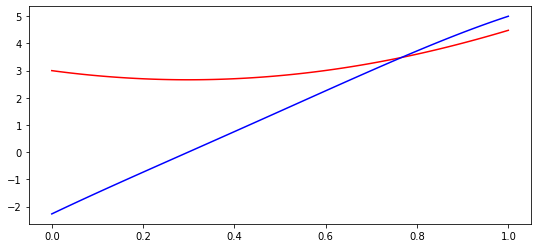

In [258]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

xspan = [0, 1]
A = -2; dA = 0.5              #A initial guess
x = np.linspace(0, 1, 100)

def bvpexam_rhs(x, y):  #original function
    return [y[1], -(x**2 - np.sin(x)) * y[1] + (np.cos(x))**2 * y[0] + 5]


for j in range(100):
    y = [3, A]
    sol = solve_ivp(bvpexam_rhs, xspan, y, t_eval = x)
    print ('iteration step = %i' %j)
    if abs(sol.y[1][-1] - 5) < 1e-6:
        fig = plt.figure(figsize=(9,4))
        plt.plot(x, sol.y[0], 'r')
        plt.plot(x, sol.y[1], 'b')
        print ('A = %f' %A)
        break
    
    if sol.y[1][-1] < 5:
        A = A + dA
    else:
        A = A - dA
        dA = dA / 2
        

### Kutz 7.5 Implementation of Shooting and Convergence Studies

Eigenvalues and eigenfunctions: The infinite domain
equation:

$$\frac{d^{2}\psi_{n}}{dx^{2}} + [n(x)-\beta_{n}]\psi_{n} = 0$$

where
$n(x) = 100$

code implementation: <br>
$x'_{1} = \psi'_{n} = x_{2}$<br>
$x'_{2} = \psi''_{n} = [\beta_{n}-n(x)]\psi_{n}=[\beta_{n}-n(x)]x_{1}$

iteration count = 0
iteration count = 1
iteration count = 2
iteration count = 3
iteration count = 4
iteration count = 5
iteration count = 6
iteration count = 7
iteration count = 8
iteration count = 9
iteration count = 10
iteration count = 11
iteration count = 12
iteration count = 13
iteration count = 14
iteration count = 15
iteration count = 16
iteration count = 17
iteration count = 18
iteration count = 19
iteration count = 20
iteration count = 21
iteration count = 22
iteration count = 23
iteration count = 24
iteration count = 25
iteration count = 26
iteration count = 27
iteration count = 28
iteration count = 29
iteration count = 30
iteration count = 31
iteration count = 32
1
iteration count = 0
iteration count = 1
iteration count = 2
iteration count = 3
iteration count = 4
iteration count = 5
iteration count = 6
iteration count = 7
iteration count = 8
iteration count = 9
iteration count = 10
iteration count = 11
iteration count = 12
iteration count = 13
iteration count = 14
iteration 

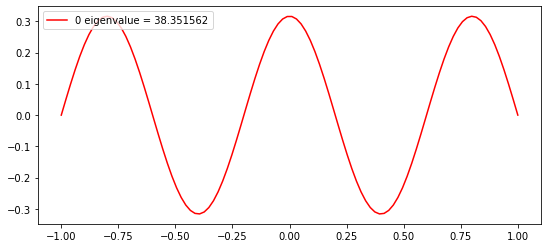

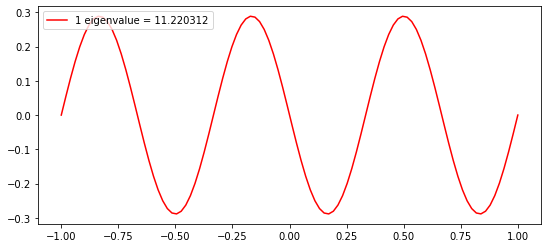

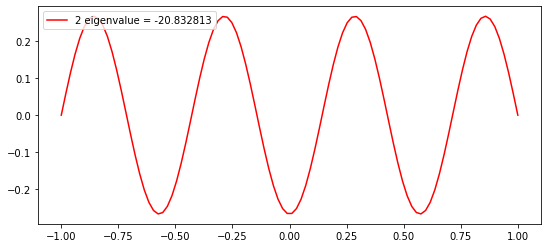

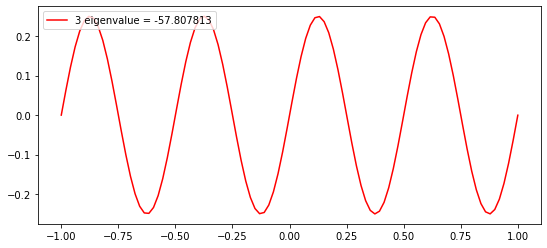

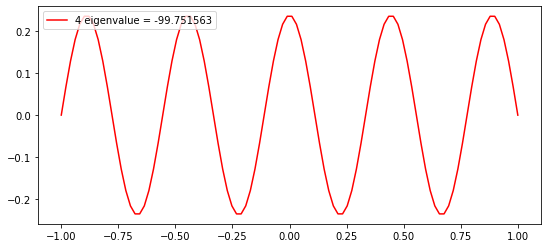

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

tol = 1e-4
n0 = 100
A = 1
x = [0, A]
xp = [-1, 1]
t = np.linspace(-1, 1, 100)

beta_start = 60               #beta --> eigenvalue, initial guess, beta 60 for comparing direct method(relaxation)
#beta_start = 99                #this beta reproduce Kutz book

def shoot2(t, y, beta, n0):  #original function
    #return [y[1], (beta-100) * y[0] - 10 * y[0]**3]  #nonlinear equation
    return [y[1], y[0] * (beta - n0)]                #linear equation

modes = 0
beta_out = []
while modes < 5:
    beta = beta_start
    dbeta = n0/100
    for i in range(1000):
        print ('iteration count = %i' %i)
        sol = solve_ivp(shoot2, xp, x, t_eval = t, args = [beta, n0])  # args = [beta, n0]
        yend = sol.y[0][-1]
        parity = (-1)**(modes)
        if abs(sol.y[0][-1] - 0) < tol:
            beta_out.append(beta)
            norm = np.trapz(abs(sol.y[0]),t)
            fig = plt.figure(figsize=(9,4))
            plt.plot(t, sol.y[0]/np.sqrt(norm), 'r', label = '%i eigenvalue = %f' %(modes, beta))
            plt.legend(loc='upper left')
            modes = modes + 1
            print (modes)
            break
        if parity * yend > 0:
            beta = beta - dbeta
        else:
            beta = beta + dbeta/2
            dbeta = dbeta/2
    beta_start = beta - 0.1


print (beta_out)

#### Kutz 7.7 Implementing MATLAB for Boundary Value Problems

Equation: 
$$y'' + 3y' + 6y = 5$$

with boundary condition

$y(1) = 3$<br>
$y(3) + 2y'(3) = 5$

[[10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
<function fun at 0x00000156266C0048>


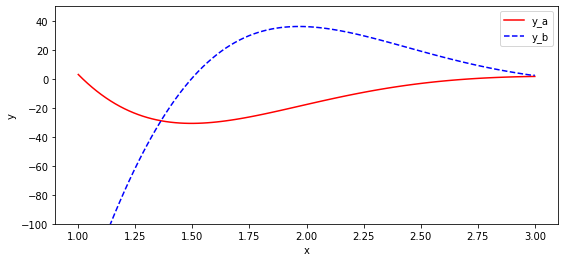

In [3]:
import numpy as np

def fun(x, y):
    return np.vstack((y[1], -5 -3 * y[1] - 6 * y[0]))

def bc(ya, yb):
    return np.array([ya[0] -3 , yb[0] + 2 * yb[0] -5])

x = np.linspace(1, 3, 10)

y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_a[0] = 10000               #guess solution, linear equation minor effect

print (y_a)
print (y_b)
print (fun)

from scipy.integrate import solve_bvp
res_a = solve_bvp(fun, bc, x, y_a)
res_b = solve_bvp(fun, bc, x, y_b)

x_plot = np.linspace(1, 3, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]
import matplotlib.pyplot as plt

#testx = [0,1,2,3,4,5,6]
#testy = [0,1,2,3,4,5,6]
#a = np.gradient(testy, testx)
#h = x_plot[1]-x_plot[0]
#print ((y_plot_a[1]-y_plot_a[0])/h)

fig = plt.figure(figsize=(9,4))
plt.ylim(-100, 50)
plt.plot(x_plot, y_plot_a, 'r', label='y_a')
plt.plot(x_plot, np.gradient(y_plot_a, x_plot), 'b--', label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Nonlinear engenvlaue problem

equation:
$$y'' + (100-\beta)y+\gamma y^{3} = 0$$

144.6669512919335


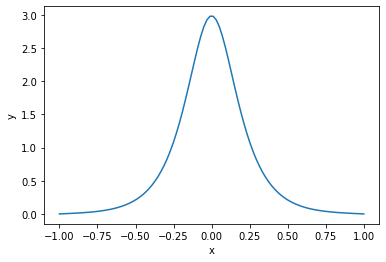

In [6]:
import numpy as np
import math

gamma = 10

def fun(x, y, p):
    k = p[0]
    return np.vstack((y[1], (k-100) * y[0] - gamma * y[0]**3))

def bc(ya, yb, p):
    k = p[0]
    return np.array([ya[0], yb[0], ya[1] - 0.1])

x = np.linspace(-1, 1, 50)
y = np.zeros((2, x.size))

y[0] = np.cos(np.pi/2 * x)                  #guess solution, non-linear equation huge effect (this is for correct answer)
y[1] = -(np.pi/2) * np.sin((np.pi/2) * x)
#y[0] = 0
#y[1] = 1


sol = solve_bvp(fun, bc, x, y, p=[90])
#sol = solve_bvp(fun, bc, x, y, p=[60])      #guess eigenvalue for comparing Shooting method problem

print (sol.p[0])

x_plot = np.linspace(-1, 1, 100)
y_plot = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Kutz 7.8 Linear Operators and Computing Spectra

$$Lv=-\frac{d^{2}v}{dx^{2}}+x^{2}v=\lambda v$$

boundary condition:
$$V(\pm L)=0$$

[[-1262.53125    631.265625     0.       ...     0.           0.
   -631.265625]
 [  631.265625 -1262.53125    631.265625 ...     0.           0.
      0.      ]
 [    0.         631.265625 -1262.53125  ...     0.           0.
      0.      ]
 ...
 [    0.           0.           0.       ... -1262.53125    631.265625
      0.      ]
 [    0.           0.           0.       ...   631.265625 -1262.53125
    631.265625]
 [  631.265625     0.           0.       ...     0.         631.265625
  -1262.53125 ]]
0.9998997504217645


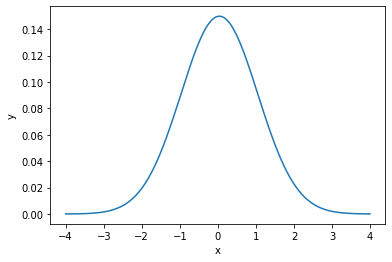

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def second_derivative(dx, N, boundary):
    B = np.zeros((N,N))
    for j in range(N):
        B[j,j] = -2
    
    for j in range(N-1):
        B[j,j+1] = 1
        B[j+1,j] = 1
    
   # print (B)
    if boundary == 'Dirichlet':
        B = B / (dx**2)
    
    elif boundary == 'Neumann':
        B[0,0] = -2 / 3; B[0,1] = 2 / 3
        B[-1,-1] = -2 / 3; B[-1,-2] = 2 / 3
        B = B / (dx**2)
    
    elif boundary == 'Periodic':

        B[-1,0] = 1; B[0,-1] = -1
        B = B / (dx**2)
    
    return B

L = 4
N = 200
x = np.linspace(-L, L, N+2)
xx = np.linspace(-L, L, N)
dx = x[2] - x[1]

P = np.zeros((N,N))
for j in range(N):
    #P[j, j] = (-100+x[j])   #L --> 1, matrix vs. shooting method
    P[j, j] = x[j]**2        #L=4 and this condition reproduce Kutz book


H = second_derivative(dx, N, 'Periodic')
print (H)
    
linL = -H + P

(w,v) = np.linalg.eigh(linL)
num = np.argsort(w)

print (w[0])

plt.plot(xx, v[:,0])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Appendix
ivp problem cod test

[ 1.          1.10037598  1.42178879  2.0284246   3.04305084  4.6677335
  7.22940961 11.24630897 17.51640666 27.30935072]


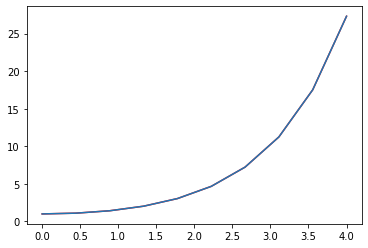

In [236]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

beta = 1
n0 = 0

#solve y''=y

def shoot2(t, y, beta, n0):  #original function
    return [y[1], y[0] * (beta - n0)]



t = np.linspace(0, 4, 10)

#function2 = lambda t, y: function1(t, y, k = 10)  #function with only t and y

solution = solve_ivp(shoot2, [0, 4], [1, 0], t_eval = t, args = [beta, n0])  # args = [beta, n0]

print (solution.y[0])
plt.plot(t, solution.y[0], 'r', label='y_a')
plt.plot(t, np.exp(t)/2 + np.exp(-t)/2)


In [8]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from copy import deepcopy

A = np.array([[4, 1],[1, 3]], dtype=float)
b = np.array([1, 2], dtype=float)
c = 0.
print(A.shape, b.shape, c)
n = len(A[0])

def f(x):
    """ x is a vector, of shape=[n]"""
    return (1 / 2) * np.matmul(np.matmul(x.T, A), x) - np.matmul(b.T, x) + c

def steepest_grad_decent(A, b, init, step, history=False):
    x = deepcopy(init)
    memo = [x]
    bound = 1e-7
    while step - 1:
        r = b - np.matmul(A, x)  # -graadient of f(x_i), of shape=[n]
        # find optimal learning rate for the current point.
        alpha = np.matmul(r.T, r) / np.matmul(np.matmul(r.T, A), r)  # scalar
        x = x + alpha * r
        if bound > sum(np.abs(alpha * r)): break
        if history: memo.append(x)
        step -= 1
    if not history: return x
    return x, np.array(list(zip(*memo)))

num_steps = 100
init = np.array([2, 1])
ans, history = steepest_grad_decent(A, b, init, step=num_steps, history=True)
print(f(init), f(ans))
print(ans)

(2, 2) (2,) 0.0
7.5 -0.6818181818181818
[0.09090909 0.63636364]
